<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import datetime as dt
import time
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import kaleido

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
df = pd.read_csv('data/hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


    3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
df.shape

(44744, 12)

5. Выведите основную статистическую информацию о столбцах.


In [6]:
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000 Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
df_copy = df.copy()
df_copy['Образование'] = df_copy['Образование и ВУЗ'].apply(lambda x: 'высшее' if x.startswith('Высшее') else ('неоконченное высшее' if x.startswith('Неоконченное высшее') else ('среднее специальное' if x.startswith('Среднее специальное') else('среднее')))) #удобнее сделать отдельную функцию, чем так расписывать lambda
df_copy.drop('Образование и ВУЗ',axis=1, inplace=True)
df_copy[df_copy['Образование'] == 'среднее'].shape

(559, 12)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
def get_age(data):
    age = data.split(',')[1]
    age = age.split(' ')
    return int(age[2])

def get_sex(data):
    sex = data.split(',')[0]
    if sex.startswith('Мужчина'):
        sex = 'М'
    else:
        sex = 'Ж'
    return sex



In [9]:
df_copy['Пол'] = df_copy['Пол, возраст'].apply(get_sex)
df_copy['Возраст'] = df_copy['Пол, возраст'].apply(get_age)
df_copy.drop('Пол, возраст', axis=1, inplace=True)
df_copy

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30
44740,39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27
44741,40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48
44742,20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24


In [10]:
print(df_copy['Пол'].value_counts(normalize=True))
print(df_copy['Возраст'].mean())

М    0.809293
Ж    0.190707
Name: Пол, dtype: float64
32.19674146254246


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [11]:
def job_exp(data):
    years = 0
    months = 0
    year = ['год', 'года', 'лет'] #для нахождения годов
    month = ['месяц','месяцев', 'месяца'] #для нахождения месяцев
    if data == 'Не указано' or data is np.nan:
        return None
    #data = str(data)
    data = data.split(' ')[:7]
    for c in year:
        if c in data:
            years += int(data[(data.index(c)-1)])
    for c in month:
        if c in data:
            months += int(data[(data.index(c)-1)])
    return int(12 * years + months)

In [12]:
df_copy['Опыт работы месяцы'] = df_copy['Опыт работы'].apply(job_exp)

In [13]:
df_copy.drop('Опыт работы', inplace=True, axis=1)
#df_copy.drop('Опыт работы (месяц)', axis=1, inplace=True)
df_copy['Опыт работы месяцы'].median()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [14]:
def get_city(data):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    data = data.split(',')[0]
    for city in million_cities:
        if data.find(city) != -1:
            return 'город-миллионик'
    if data.find('Москва') != -1:
        return 'Москва'
    elif data.find('Санкт-Петербург') != -1:
        return 'Санкт-Петербург'
    else:
        return 'другие'

def get_move_status(data):
    unready_words = ['не готов', 'не готова']
    data = data.split(',')
    if data[1].find('м.') != -1:
       data.pop(1)
    data = data[1]
    if data is np.nan:
        return False
    for c in unready_words:
        if data.find(c) != -1:
            return False
        elif data.find('хочу') != -1: #добавил из готового решения, потому что не мог понять, почему ответ 32 процента, а не 33. В питоне округление работает по банковскому типу - округляет до ближайшего четного, поэтому и не сходилось :)
            return True
        else:
            return True

def get_business_trip_status(data):
    unready_words = ['не готов', 'не готова']
    data = data.split(',')
    if data[1].find('м.') != -1:
       data.pop(1)
    data = data[2]
    if data is np.nan:
        return False
    for c in unready_words:
        if data.find(c) != -1:
            return False
        else:
            return True


In [15]:
df_copy['Город'] = df_copy['Город, переезд, командировки'].apply(get_city)
df_copy['Готовность к переезду'] = df_copy['Город, переезд, командировки'].apply(get_move_status)
df_copy['Готовность к командировкам'] = df_copy['Город, переезд, командировки'].apply(get_business_trip_status)
df_copy.drop('Город, переезд, командировки', inplace=True, axis=1)

In [16]:
df_copy

,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы месяцы,Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,другие,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,другие,False,True
4,140000 руб.,Региональный менеджер по продажам,полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,Москва,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...",полная занятость,"полный день, удаленная работа","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0,другие,True,True
44740,39000 руб.,"Системный администратор, IT-специалист","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0,другие,True,True
44741,40000 руб.,"Аналитик данных, Математик",полная занятость,"полный день, удаленная работа","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48,257.0,город-миллионик,True,True
44742,20000 руб.,Контент-менеджер,"частичная занятость, полная занятость",удаленная работа,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24,46.0,другие,False,False


In [17]:
df_copy['Город'].value_counts(normalize=True)

Москва             0.371469
другие             0.353723
город-миллионик    0.164469
Санкт-Петербург    0.110339
Name: Город, dtype: float64

In [18]:
round(df_copy[(df_copy['Готовность к командировкам'] == True)&(df_copy['Готовность к переезду'] == True)]['Готовность к переезду'].count()/df_copy.shape[0]*100)

33

In [19]:
df_copy

,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы месяцы,Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,другие,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,другие,False,True
4,140000 руб.,Региональный менеджер по продажам,полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,Москва,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...",полная занятость,"полный день, удаленная работа","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0,другие,True,True
44740,39000 руб.,"Системный администратор, IT-специалист","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0,другие,True,True
44741,40000 руб.,"Аналитик данных, Математик",полная занятость,"полный день, удаленная работа","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48,257.0,город-миллионик,True,True
44742,20000 руб.,Контент-менеджер,"частичная занятость, полная занятость",удаленная работа,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24,46.0,другие,False,False


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [20]:
df_copy.columns


Index(['ЗП', 'Ищет работу на должность:', 'Занятость', 'График',
       'Последнее/нынешнее место работы', 'Последняя/нынешняя должность',
       'Обновление резюме', 'Авто', 'Образование', 'Пол', 'Возраст',
       'Опыт работы месяцы', 'Город', 'Готовность к переезду',
       'Готовность к командировкам'],
      dtype='object')

In [21]:
employment_list = ['полная занятость', 'частичная занятость', 'проектная работа',
                   'стажировка', 'волонтерство']
charts = ['полный день', 'сменный график',
         'гибкий график', 'удаленная работа',
         'вахтовый метод']
for employment, chart in zip(employment_list, charts):
    df_copy[employment] = df_copy['Занятость'].apply(lambda x: employment in x)
    df_copy[chart] = df_copy['График'].apply(lambda x: chart in x)
df_copy.drop('Занятость', axis=1, inplace=True)
df_copy.drop('График', axis=1, inplace=True)
print(df_copy[df_copy['проектная работа'] & df_copy['волонтерство']].shape[0])
print(df_copy[df_copy['вахтовый метод'] & df_copy['гибкий график']].shape[0])

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [22]:
df_currency = pd.read_csv('data/ExchangeRates.csv', sep=',')
df_currency_copy = df_currency.copy()
df_currency_copy.drop(['per', 'time', 'vol'], inplace=True, axis=1)
df_copy['Обновление резюме'] = df_copy['Обновление резюме'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y %H:%M').date().strftime('%d/%m/%y')) # изменил формат записи даты

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Последнее/нынешнее место работы  44743 non-null  object 
 3   Последняя/нынешняя должность     44742 non-null  object 
 4   Обновление резюме                44744 non-null  object 
 5   Авто                             44744 non-null  object 
 6   Образование                      44744 non-null  object 
 7   Пол                              44744 non-null  object 
 8   Возраст                          44744 non-null  int64  
 9   Опыт работы месяцы               44574 non-null  float64
 10  Город                            44744 non-null  object 
 11  Готовность к переезду            44744 non-null  bool   
 12  Готовность к коман

In [24]:
df_currency_copy['For_one'] = df_currency_copy['close']/df_currency_copy['proportion']

In [25]:
df_copy['Обновление резюме'].apply(lambda x: x.split())

0        [16/04/19]
1        [12/04/19]
2        [16/04/19]
3        [08/04/19]
4        [22/04/19]
            ...    
44739    [22/04/19]
44740    [22/04/19]
44741    [09/04/19]
44742    [26/04/19]
44743    [05/07/18]
Name: Обновление резюме, Length: 44744, dtype: object

In [26]:
data_name_currency = ['грн.', 'USD', 'EUR', 'бел.руб.', 'KGS', 'сум', 'AZN', 'KZT', 'руб.']
data_iso_currency = ['UAH', 'USD', 'EUR', 'BYN', 'KGS', 'UZS', 'AZN', 'KZT', 'RUB']
for c, l in zip(data_name_currency, data_iso_currency):
    df_copy['ЗП'] = df_copy['ЗП'].apply(lambda x: x.replace(c, l))
df_copy['Валюта'] = df_copy['ЗП'].apply(lambda x: x.split()[1])
df_copy['ЗП'] = df_copy['ЗП'].apply(lambda x: x.split()[0])
df_copy


,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы месяцы,...,полный день,частичная занятость,сменный график,проектная работа,гибкий график,стажировка,удаленная работа,волонтерство,вахтовый метод,Валюта
0,29000,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16/04/19,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,True,True,True,True,True,False,True,False,True,RUB
1,40000,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12/04/19,Не указано,высшее,М,60,233.0,...,True,True,True,True,True,False,True,False,False,RUB
2,20000,Оператор,ПАО Сбербанк,Кассир-операционист,16/04/19,Не указано,среднее специальное,Ж,36,123.0,...,True,False,False,False,False,False,False,False,False,RUB
3,100000,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08/04/19,Не указано,высшее,М,38,225.0,...,False,True,False,True,True,False,True,False,False,RUB
4,140000,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22/04/19,Не указано,высшее,Ж,26,67.0,...,True,False,False,False,False,False,False,False,False,RUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22/04/19,Не указано,высшее,М,30,91.0,...,True,False,False,False,False,False,True,False,False,RUB
44740,39000,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,22/04/19,Не указано,высшее,М,27,84.0,...,True,True,True,True,True,False,True,False,False,RUB
44741,40000,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09/04/19,Не указано,высшее,Ж,48,257.0,...,True,False,False,False,False,False,True,False,False,RUB
44742,20000,Контент-менеджер,IQ-Maxima,Менеджер проектов,26/04/19,Имеется собственный автомобиль,высшее,М,24,46.0,...,False,True,False,False,False,False,True,False,False,RUB


In [27]:
df_copy['ЗП'] = df_copy['ЗП'].apply(int)
pivot_table = df_copy.merge(
    df_currency_copy,
    left_on = ['Обновление резюме', 'Валюта'],
    right_on = ['date','currency'],
    how = 'left'
)
pivot_table['For_one'] = pivot_table['For_one'].fillna(1)
df_copy['ЗП (руб)'] = pivot_table['ЗП'] * pivot_table['For_one']
df_copy.drop(['ЗП', 'Валюта'], inplace=True, axis=1)
df_copy['ЗП (руб)'].median()


59019.0

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [28]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(
    go.Histogram(x=df_copy['Возраст']),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=df_copy['Возраст']),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=np.log(df_copy['Возраст'])), # логарифмируем, в возрасте значений равных 0 нет
    row=2, col=1
)
fig.update_layout(height=600, width=1500, title_text="Histogram/LogHistogram and Boxplot of Возраст")
fig.write_image("plotly/age_histogram_boxplot.png")

![title](plotly/age_histogram_boxplot.png)
Видим на гистограмме логнормальное распределение + ассиметрия вправо
Большинство находятся между 27 и 36 годами, медианный возраст 31
Нужно будет прологарифмировать, чтобы в дальнейшем воспользоватьтся методами для очистки данных( т.к для них нужно нормальное распределение )

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [29]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(
    go.Histogram(x=df_copy['Опыт работы месяцы']),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=df_copy['Опыт работы месяцы']),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=np.log(df_copy['Опыт работы месяцы'])), # логарифмируем, в возрасте значений равных 0 нет
    row=2, col=1
)
fig.update_layout(height=600, width=1500, title_text="Histogram/LogHistogram and Boxplot of Опыт")
fig.write_image("plotly/exp_histogram_boxplot.png")

![title](plotly/exp_histogram_boxplot.png)
Снова видим логнормальное распределение, для дальнейшей очистки выбросов нужно будет прологаримировать, чтобы привести к нормальному распределению. (Зачем мне пытаться определить на глаз выбросы, если можно будет воспользоваться одним из методов для этого в дальнейшем? Видно, что выбросы есть )
Медиана опыта работы равна 100месяцам, опыт большинства находится между 57 и 154, граничные значения: 1 и 299 месяцев

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [30]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(
    go.Histogram(x=df_copy['ЗП (руб)']),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=df_copy['ЗП (руб)']),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=np.log(df_copy['ЗП (руб)'])), # логарифмируем, в возрасте значений равных 0 нет
    row=2, col=1
)
fig.update_layout(height=600, width=1500, title_text="Histogram/LogHistogram and Boxplot of ЗП")
fig.write_image("plotly/salary_histogram_boxplot.png")

![title](plotly/salary_histogram_boxplot.png)
Более явно видны выбросы( сплющенные графики )
Все также логнормальное распределение
Большинство находится между 37т и 95т
Предельные значения 1т и 180т

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [31]:
df_salary_filtered = df_copy[df_copy['ЗП (руб)'] < 1000000]
group = df_salary_filtered.groupby('Образование', as_index=False)['ЗП (руб)'].median()
fig = px.histogram(x=group['Образование'], y=group['ЗП (руб)'], title='Гистограмма медианной зарплаты от образования')
fig.write_image("plotly/clean_median_salary_edu_histogram.png")

![](plotly/clean_median_salary_edu_histogram.png)
    4. Ожидаемые результаты, это вполне очевидно, что зп коррелирует с уровнем образования человека, график подтверждает наши догадки, такую очевидную корреляцию можно не подтверждать статистически, тк это ожидаемо. Медиана больше у тех, кто закончил высшее, на равне среднее и среднее специальное

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [32]:
df_salary_filtered = df_copy[df_copy['ЗП (руб)'] < 1000000]
fig = px.box(df_salary_filtered, x='Город', y='ЗП (руб)', title='Распределение желаемой ЗП в зависимости от города')
fig.write_image("plotly/salary_city_boxplot.png")


![](plotly/salary_city_boxplot.png)
Вполне ожидаемые результаты, самая высокая медиана в Москве потом в СПБ, удивительно, что в миллионниках столько же, сколько и в других.
Также видим, что не в зависимости от города, в зарплатах присутствуют выбросы(сплющенные боксплоты, много данных за границей)

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [33]:
group_move = df_copy.groupby(['Готовность к переезду','Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
fig = px.bar(group_move, y='Готовность к переезду', x='ЗП (руб)', barmode='group', color='Готовность к командировкам', orientation='h')
fig.write_image("plotly/clean_ready_salary_bar.png")
df_filtered = df_copy[(df_copy['Готовность к командировкам'] == True)&(df_copy['Готовность к переезду'] == True)]['ЗП (руб)'].median()
print(df_filtered)

65000.0


![](plotly/clean_ready_salary_bar.png)
ЗП выше в тех категориях, где у человека больше готовности к изменениям(командировкам, переезду)

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [34]:
pivot_data = df_copy.groupby(['Возраст', 'Образование'], as_index=False)['ЗП (руб)'].median()
pivot = pivot_data.pivot_table(
    values = 'ЗП (руб)',
    columns = 'Возраст',
    index = 'Образование',
    fill_value=0
)
print(pivot)

Возраст                14     15         16       17     18     19     20   \
Образование                                                                  
высшее               60000      0  122582.49  90075.5  30000  30000  30000   
неоконченное высшее      0      0       0.00  80000.0  25000  30000  31000   
среднее                  0  10000       0.00  44000.0  35000  45000  29000   
среднее специальное      0   2000   30000.00  25000.0  25151  30000  30000   

Возраст                21     22     23   ...     67     68      69     70   \
Образование                               ...                                 
высшее               35000  40000  45000  ...   70000  79000  112500  80000   
неоконченное высшее  35000  40000  40000  ...       0      0       0      0   
среднее              40000  40000  35000  ...       0      0       0      0   
среднее специальное  30000  30000  35000  ...  120000      0       0      0   

Возраст                71     72     73     76     77   

In [35]:
fig = px.imshow(pivot)
fig.write_image("plotly/clean_edu_age_heatmap.png")

![](plotly/clean_edu_age_heatmap.png)
Cамый быстрый рост ЗП у тех у кого высшее образование, также более возрастная категория присутствует только с высшем образованием(с образованием люди более востребованы, чем без образования )

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

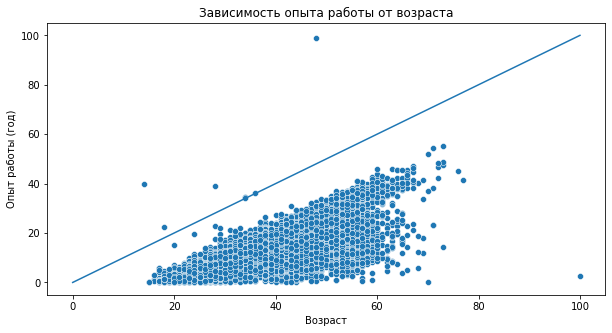

In [36]:
fig = plt.figure(figsize=(10, 5))
scatter_data = df_copy.copy()
scatter_data['Опыт работы (год)'] = scatter_data['Опыт работы месяцы']/12
sns.lineplot(x=[0, 100], y=[0, 100])
ax = sns.scatterplot(
    data=scatter_data,
    x='Возраст',
    y='Опыт работы (год)',
)
ax.set_title('Зависимость опыта работы от возраста');

In [37]:
fig1 = px.scatter(
    data_frame=scatter_data,
    y='Опыт работы (год)',
    x='Возраст'
)
fig2 = px.line(x=[0, 100],
               y=[0, 100])
fig = go.Figure(data = fig1.data + fig2.data)
fig.update_xaxes(title='Возраст')
fig.update_yaxes(title='Опыт работы (год)')
fig.write_image("plotly/exp_age_scatter.png")

In [38]:
scatter_data[scatter_data['Опыт работы (год)']>=scatter_data['Возраст']].shape[0]

7

![](plotly/exp_age_scatter.png)
Есть очевидные аномалии в количестве 7 штук. Все остальные с первого взгляда выглядят адекватно ( может быть, слишком много резюме людей преклонного возраста )

In [39]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [40]:
df_cleaning = df_copy.copy()
print(df_cleaning.duplicated().value_counts())
df_cleaning = df_cleaning.drop_duplicates()
df_cleaning

False    44583
True       161
dtype: int64


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы месяцы,Город,...,полный день,частичная занятость,сменный график,проектная работа,гибкий график,стажировка,удаленная работа,волонтерство,вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16/04/19,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,True,True,True,True,False,True,False,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12/04/19,Не указано,высшее,М,60,233.0,другие,...,True,True,True,True,True,False,True,False,False,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,16/04/19,Не указано,среднее специальное,Ж,36,123.0,другие,...,True,False,False,False,False,False,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08/04/19,Не указано,высшее,М,38,225.0,другие,...,False,True,False,True,True,False,True,False,False,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22/04/19,Не указано,высшее,Ж,26,67.0,Москва,...,True,False,False,False,False,False,False,False,False,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22/04/19,Не указано,высшее,М,30,91.0,другие,...,True,False,False,False,False,False,True,False,False,50000.0
44740,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,22/04/19,Не указано,высшее,М,27,84.0,другие,...,True,True,True,True,True,False,True,False,False,39000.0
44741,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09/04/19,Не указано,высшее,Ж,48,257.0,город-миллионик,...,True,False,False,False,False,False,True,False,False,40000.0
44742,Контент-менеджер,IQ-Maxima,Менеджер проектов,26/04/19,Имеется собственный автомобиль,высшее,М,24,46.0,другие,...,False,True,False,False,False,False,True,False,False,20000.0


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [41]:
df_cleaning.isnull().sum(axis=0)

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы месяцы                 168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
полный день                          0
частичная занятость                  0
сменный график                       0
проектная работа                     0
гибкий график                        0
стажировка                           0
удаленная работа                     0
волонтерство                         0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [42]:
df_cleaning.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
df_cleaning['Опыт работы месяцы'] = df_cleaning['Опыт работы месяцы'].fillna(df_cleaning['Опыт работы месяцы'].median())
print(round(df_cleaning['Опыт работы месяцы'].mean()))

114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [43]:
df_cleaning = df_cleaning[(df_cleaning['ЗП (руб)']<=1e6) | (df_cleaning['ЗП (руб)'] >= 1e3)]

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [44]:
df_cleaning = df_cleaning[df_cleaning['Опыт работы месяцы']<df_cleaning['Возраст']]

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [45]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1) #логарифмируем, потому что распределение логнормальное
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [47]:
log_age = np.log(df_cleaning['Возраст'])
fig = px.histogram(data_frame=log_age, title='Гистограмма Возраста в лог масштабе')
fig.update_yaxes(title='Количество')
fig.add_vline(log_age.mean() - 3 * log_age.std(), line_dash='dash', line_color='blue')
fig.add_vline(log_age.mean() + 4 * log_age.std(), line_dash='dash', line_color='blue')
fig.add_vline(log_age.mean(), line_color='blue')
fig.write_image("plotly/clean_data_age_histogram.png")

![](plotly/clean_data_age_histogram.png)

In [ ]:
outliers, cleaned = outliers_z_score_mod(df_cleaning, 'Возраст', right=4, log_scale=True)
print(outliers.shape[0], cleaned.shape[0])
print(outliers['Возраст'].agg(['min','max']))
#outliers.apply(lambda x: np.exp(x))

(Ответ у меня не совпал, до этого все совпало)
Выбросы попали между 46 и 100 годами в очищенных данных
